# Attack and anomaly detection in IoT sensors in IoT sites using machine learning approaches

Article information:
* Authors: Mahmudul Hasan, Milon Islam, Ishrak Islam Zarif and M.M.A.Hashem
* Publication: 20 May 2019
* DOI: https://doi.org/10.1016/j.iot.2019.100059

## Abstract

Attack and anomaly detection in the Internet of Things (IoT) infrastructure is a rising concern in the domain of IoT.
With the increased use of IoT infrastructure in every domain, threats and attacks in these infrastructures are also growing commensurately.
Denial of Service, Data Type Probing, Malicious Control, Malicious Operation, Scan, Spying and Wrong Setup are such attacks and anomalies which can cause an IoT system failure.
In this paper, performances of several machine learning models have been compared to predict attacks and anomalies on the IoT systems accurately.
The machine learning (ML) algorithms that have been used here are Logistic Regression (LR), Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), and Artificial Neural Network (ANN).
The evaluation metrics used in the comparison of performance are accuracy, precision, recall, f1 score, and area under the Receiver Operating Characteristic Curve.
The system obtained 99.4% test accuracy for Decision Tree, Random Forest, and ANN.
Though these techniques have the same accuracy, other metrics prove that Random Forest performs comparatively better.

## Dataset description

The open source dataset was collected from [kaggle](https://www.kaggle.com/francoisxa/ds2ostraffictraces) provided by [Pahl et al.](https://ieeexplore.ieee.org/abstract/document/8584985).
They have created a virtual IoT environment using Distributed Smart Space Orchestration System (DS2OS) for producing synthetic data.
Their architecture is a collection of micro-services which communicates with each other using the Message Queuing Telemetry Transport (MQTT) protocol.
In the dataset, there are 357,952 samples and 13 features.
The dataset has 347,935 Normal data and 10,017 anomalous data and contains eight classes which were classified.
Features “Accessed Node Type” and “Value” have 148 and 2050 missing data, respectively.

## Authors

Grupo: 5 

- André Moreira, 62058
- Catarina Silva, 76399
- Luís Marques, 81526


In [1]:
# import numpy and pandas to load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# graphics
from pylab import rcParams
%matplotlib inline 
rcParams['figure.figsize'] = 8, 8

# load dataset
dataset_file = 'dataset/mainSimulationAccessTraces.csv'
df = pd.read_csv(dataset_file, header = 0)

### Attack description

1. **Denial of Service (DoS):** the DoS attack is caused by having too many unwanted traffic in a single source or receiver. The attacker sends too many ambiguous packets to flood out the target and make its services unavailable to other services.

2. **Data Type Probing (D.P):** in this case, a malicious node writes different data type than intended data type. 

3. **Malicious Control (M.C):** with software vulnerabilities sometimes the attacker can gain a valid session key or somehow capture network traffic. In this way, malicious one can control the whole system.

4. **Malicious Operation (M.O):** Malicious Operations are generally caused by malware. Malware means decoy activity which distracts the original operation. Device’s performances can negatively be affected by this malicious operation.

5. **Scan(SC):** sometimes the data is acquired through hardware by scanning the system, and in this process sometimes the data can get corrupted.

6. **Spying (SP):** by Spying, the attacker exploits the vulnerabilities of the system, and they use a backdoor channel to break into the system and discovers important information. In some cases, they manipulate data causing great hamper to the whole system.

7. **Wrong Setup (W.S):** the data may also get disrupted by the wrong system setup.

8. **Normal(NL):** if the data is entirely correct and accurate, then the data is called normal data.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   357952 non-null  object
 1   sourceAddress              357952 non-null  object
 2   sourceType                 357952 non-null  object
 3   sourceLocation             357952 non-null  object
 4   destinationServiceAddress  357952 non-null  object
 5   destinationServiceType     357952 non-null  object
 6   destinationLocation        357952 non-null  object
 7   accessedNodeAddress        357952 non-null  object
 8   accessedNodeType           357804 non-null  object
 9   operation                  357952 non-null  object
 10  value                      355902 non-null  object
 11  timestamp                  357952 non-null  int64 
 12  normality                  357952 non-null  object
dtypes: int64(1), object(12)

<AxesSubplot:>

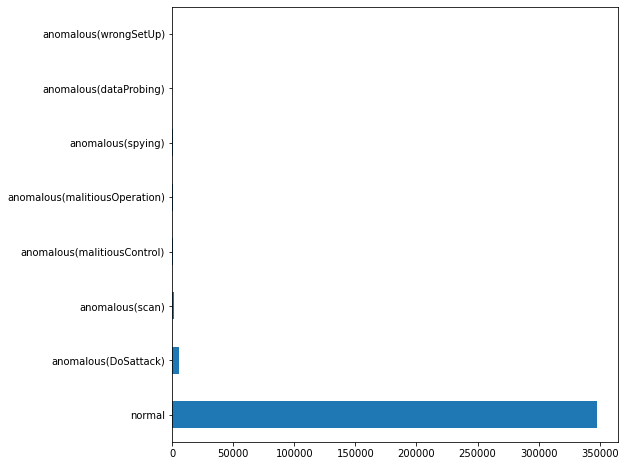

In [2]:
# Print statistics from the dataset
print('Dataset Information:')
print(df.info())
print('------------------------------------------------------')
print('Target variable frequency:')
count = df['normality'].value_counts() 
count.plot.barh()

As seen in the previous image, the dataset is quite unbalanced.
Most of the interactions between devices within the simulation are considered normal.
To have a better view of the target variable distribution, the next plot does no contain the samples classified as normal.

Target variable frequency:


<AxesSubplot:>

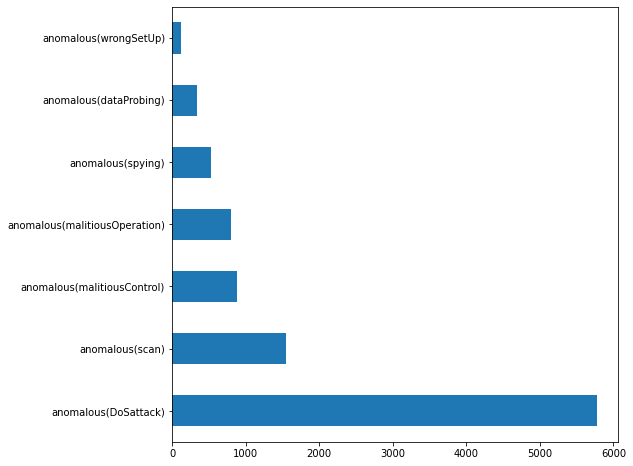

In [3]:
print('Target variable frequency:')
non_normal_df = df[df['normality'] != 'normal']
count = non_normal_df['normality'].value_counts() 
count.plot.barh()

Even after removing the samples classified as normal, the dataset remains unbalanced.
The authors did not address this issue within the paper.

### Frequency tables

Frequencies of occurences in IoT communication. 
* (a) Source Type
* (b) Destination Type
* (c) Source Location
* (d) Destination Location
* (e) Accessed Node
* (f) Operation 

#### Abbreviations for values found in dataset

In [4]:
sourceTypeValues = df.sourceType.dropna().unique()
shortSourceTypeName = ['lc', 'ms', 'ss', 'bs', 'ds', 'ts', 'ws', 'sp']

new_keys = dict(zip(sourceTypeValues, shortSourceTypeName))
# display(new_keys)

sourceLocationValues = df.sourceLocation.dropna().unique()
shortSourceLocationName = ['bp', 'dr', 'bc', 'kt', 'gg', 'bt', 'lr', 'wr', 'bd', 'et', 'sr', 'r1', 'r2', 'r3', 
                           'r4', 'r5', 'r6', 'r7', 'r9', 'r8', 'r10']

new_keys2 = dict(zip(sourceLocationValues, shortSourceLocationName))
# display(new_keys2)

accessedNodeValues = df.accessedNodeType.dropna().unique()
shortAccessedNodeName = ['lc', 'ms', 'ss', 'bl', 'nb', 'bs', 'ds', 'ts', 'ws', 'tt', 'sp', 'cp']

new_keys3 = dict(zip(accessedNodeValues, shortAccessedNodeName))
# display(new_keys3)

operationValues = df.operation.dropna().unique()
shortOperationName = ['rs', 'wr', 'rd', 'sb', 'ls']
# sb = subscribe [Não está no artigo]

new_keys4 = dict(zip(operationValues, shortOperationName))
# display(new_keys4)

# Creates short name dictionary for values in dataset
keys_dict = {**new_keys, **new_keys2, **new_keys3, **new_keys4}
import operator
keys_dict = dict(sorted(keys_dict.items(), key=operator.itemgetter(1)))
print('The following cointains abbreviations for the data found in the dataset:')
display(keys_dict)

The following cointains abbreviations for the data found in the dataset:


{'BedroomChildren': 'bc',
 'Bedroom': 'bd',
 '/derived/boolean': 'bl',
 'BedroomParents': 'bp',
 '/batteryService': 'bs',
 'Bathroom': 'bt',
 '/basic/composed': 'cp',
 'Dinningroom': 'dr',
 '/doorLockService': 'ds',
 'Entrance': 'et',
 'Garage': 'gg',
 'Kitchen': 'kt',
 '/lightControler': 'lc',
 'Livingroom': 'lr',
 'lockSubtree': 'ls',
 '/movementSensor': 'ms',
 '/basic/number': 'nb',
 'room_1': 'r1',
 'room_10': 'r10',
 'room_2': 'r2',
 'room_3': 'r3',
 'room_4': 'r4',
 'room_5': 'r5',
 'room_6': 'r6',
 'room_7': 'r7',
 'room_8': 'r8',
 'room_9': 'r9',
 'read': 'rd',
 'registerService': 'rs',
 'subscribe': 'sb',
 '/smartPhone': 'sp',
 'Showerroom': 'sr',
 '/sensorService': 'ss',
 '/thermostat': 'ts',
 '/basic/text': 'tt',
 'Watterroom': 'wr',
 'write': 'wr',
 '/washingService': 'ws'}

In [5]:
def createFrequencyTable(dict_, x_label, y_label = 'Number of Ocurrences'):    
    temp_dict = {}

#     Creates a dictionary v, k with original dictionary values and short names
    for key, value in dict_.items():
        temp_dict[dict_[key]] = keys_dict[key]

#     Converts temp_dict keys to value and vice-versa
    new_sourceType = dict((v,k) for k,v in temp_dict.items())

#     Creates plot figure
    fig, ax = plt.subplots()
    
    ax.bar(new_sourceType.keys(), new_sourceType.values())
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.show()

#### (a) Source Type

/lightControler     135775
/sensorService       85196
/batteryService      81273
/washingService      47986
/thermostat           5980
/movementSensor       1301
/doorLockService       335
/smartPhone            106
Name: sourceType, dtype: int64

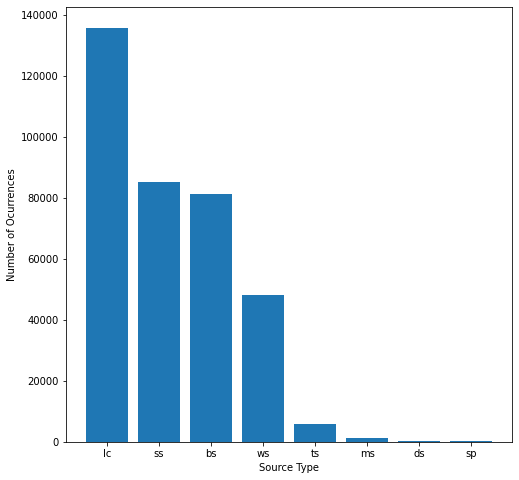

In [6]:
dict_ = df.sourceType.value_counts()
display(dict_)

x_label = 'Source Type'

createFrequencyTable(dict_, x_label)

#### (b) Destination Type

/sensorService      130313
/batteryService     129125
/movementSensor      93645
/washingService       1805
/lightControler       1694
/doorLockService      1048
/thermostat            319
/smartPhone              3
Name: destinationServiceType, dtype: int64

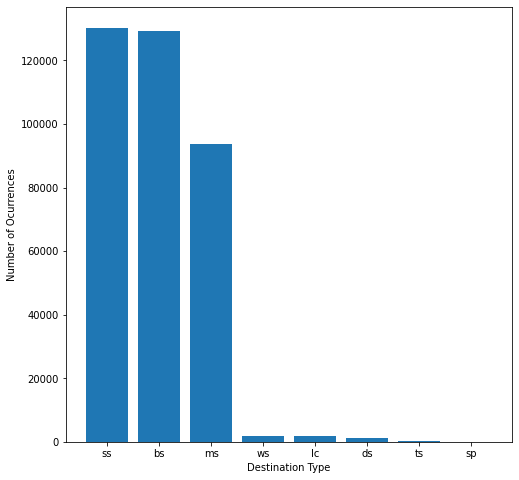

In [7]:
dict_ = df.destinationServiceType.value_counts()
display(dict_)

x_label = 'Destination Type'

createFrequencyTable(dict_, x_label)

#### (c) Source Location

Garage             39501
Watterroom         38369
Entrance           38220
Bathroom           28461
Showerroom         28315
Kitchen            18963
Dinningroom        13430
BedroomChildren    12836
room_6             11642
Bedroom            11009
BedroomParents     10946
room_8             10798
room_9             10752
Livingroom         10621
room_2             10607
room_1             10602
room_3             10597
room_5             10596
room_4             10572
room_7             10558
room_10            10557
Name: sourceLocation, dtype: int64

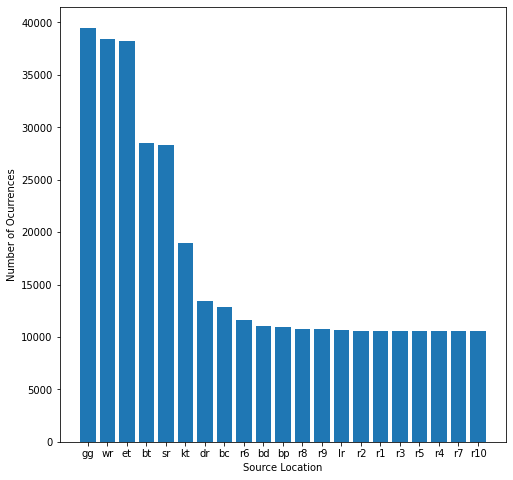

In [8]:
dict_ = df.sourceLocation.value_counts()
display(dict_)

x_label = 'Source Location'

createFrequencyTable(dict_, x_label)

#### (d) Destination Location

Garage             57102
Entrance           54451
Watterroom         38525
Kitchen            19438
BedroomChildren    12768
Bathroom           12684
Showerroom         12583
BedroomParents     10938
room_9             10843
room_2             10829
room_1             10806
Livingroom         10782
Dinningroom        10760
room_6             10741
room_3             10732
room_4             10708
room_5             10687
room_8             10651
room_7             10649
room_10            10648
Bedroom            10627
Name: destinationLocation, dtype: int64

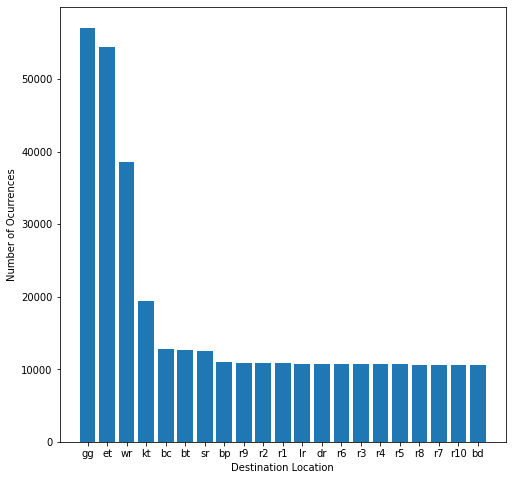

In [9]:
dict_ = df.destinationLocation.value_counts()
display(dict_)

x_label = 'Destination Location'

createFrequencyTable(dict_, x_label)

#### (e) Accessed Node

/sensorService      130155
/derived/boolean     94725
/basic/number        90016
/basic/text          42433
/thermostat            313
/basic/composed        100
/lightControler         23
/movementSensor         22
/batteryService          6
/doorLockService         5
/washingService          3
/smartPhone              3
Name: accessedNodeType, dtype: int64

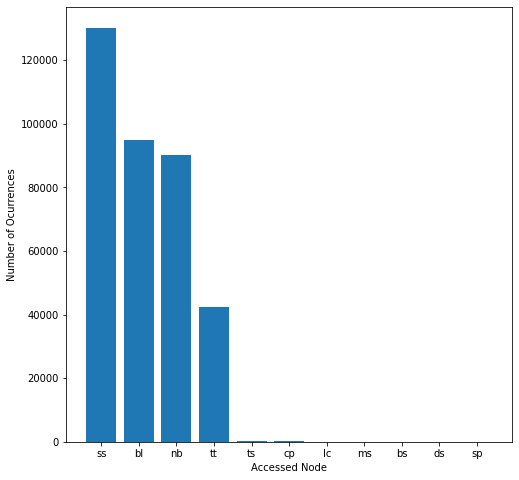

In [10]:
dict_ = df.accessedNodeType.value_counts()
display(dict_)

x_label = 'Accessed Node'

createFrequencyTable(dict_, x_label)

#### (f) Operation

read               248061
write              109648
lockSubtree           148
registerService        84
subscribe              11
Name: operation, dtype: int64

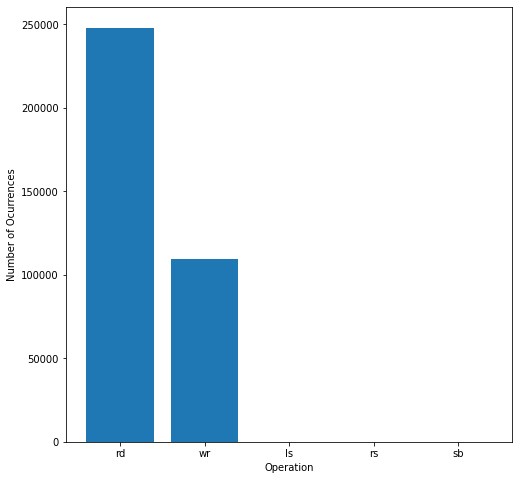

In [11]:
dict_ = df.operation.value_counts()
display(dict_)

x_label = 'Operation'

createFrequencyTable(dict_, x_label)

## Data preprocessing

Any machine learning research requires exploratory data analysis and data observation.
The first task in this research was to make the dataset feed-able to any classifier.
So for this reason, the first step was to handle the missing data. 

In the dataset, **Accessed Node Type** column and **Value** column contain missing values due to anomaly raised in data transferring. 
From these two features, **Accessed Node Type** feature has categorical values on the other hand **Value** feature has continuous values. 

**Accessed Node Type** feature has 148 rows containing _NaN_ value depicted as _Not a Number_, and the corresponding class or label of that row are found to be anomalous. As the **Accessed Node Type** feature is categorical and removing these 148 rows might cause loss of valuable data, so the _NaN_ value in **Accessed Node Type** is replaced with the _Malicious_ value.

Similarly, **Value** column also contains some unexpected data which are not continuous values. 
These unexpected values are transformed into meaningful continuous values that assist the classifiers to have better accuracy.
Unexpected values _False_, _True_, _Twenty_ and _none_ in the **Value** feature are replaced by meaningful values _0.0_, _1.0_, _20.0_ and _0.0_, respectively.

**Attention:**

In where we describe aditional preprocessing steps that where not mentioned on the work, but are necessary to clean the dataset.
Some values in the column **Value** are missing or are strings of this type: "org.ds2os.vsl.core.utils.AddressParameters@181ae4a8"

Since the authors want to convert the column **Value** to numerical, the following strategy was applied:
1. All missing values where replaces with 0 
2. Select all **Values** that start with "org."
3. Split the string into to parts by the "@" character
4. Convert the second part into a numerical value (base16 convertion)

In [12]:
# Fix missing Accessed Node Type
df = df.fillna({'accessedNodeType': 'Malicious'})

# Fix the malformated values in column Value
df = df.fillna({'value': 0.0})
replace_values = {'true': 1.0, 'false': 0.0, 'twenty': 20.0, 'none': 0.0}
df = df.replace({'value':replace_values})

# Fix other errors not mentioned on the paper
df.loc[df.value.str.contains('^org').fillna(False), 'value'] = df[df.value.str.contains('^org').fillna(False)]['value'].apply(lambda x: int(x.split('@')[1],16))

# Replace the names of the target variable to be consistent with the paper
replace_values={'anomalous(DoSattack)':'DoS', 'anomalous(scan)': 'SC', 'anomalous(malitiousControl)':'M.C',
               'anomalous(malitiousOperation)': 'M.O', 'anomalous(spying)':'SP', 'anomalous(dataProbing)':'D.P',
               'anomalous(wrongSetUp)':'W.S', 'normal':'NL'}
df = df.replace({'normality':replace_values})

# Check for NaN values
missing = df.isnull().values.any()
print('Missing Values ? {}'.format(missing))

Missing Values ? False


## Feature selection

For feature selection, no machine learning approach has been taken here like Pahl et al. because this will not have any significant impact on data analysis. Besides this timestamp column from the dataset has been removed as it has a minimal correlation to the dataset’s predictor variable normality.

In [13]:
df = df.drop('timestamp', 1)
print('Dataset Information:')
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   357952 non-null  object
 1   sourceAddress              357952 non-null  object
 2   sourceType                 357952 non-null  object
 3   sourceLocation             357952 non-null  object
 4   destinationServiceAddress  357952 non-null  object
 5   destinationServiceType     357952 non-null  object
 6   destinationLocation        357952 non-null  object
 7   accessedNodeAddress        357952 non-null  object
 8   accessedNodeType           357952 non-null  object
 9   operation                  357952 non-null  object
 10  value                      357952 non-null  object
 11  normality                  357952 non-null  object
dtypes: object(12)
memory usage: 32.8+ MB
None


Next vital task is to converting nominal categorical data into vectors. Categorical data can be converted into vectors in many ways.
**Label Encoding** and **One Hot Encoding** is prevalent among them. 
In this research **label encoding** technique have been used to convert the data into a feature vector.

Furthermore, the **Value** column needs to be converted into numerical.

In [14]:
print('Dataset datatypes (before transformation):')
print(df.dtypes)

# Convert value to float
df['value'] = pd.to_numeric(df['value'])

# Convert target variable to categorical
df['normality'] = df['normality'].astype('category')

# Apply label enconding to the remaining columns
# The label encoding was applied directly with pandas
columns=['sourceID', 'sourceAddress', 'sourceType',
'sourceLocation', 'destinationServiceAddress', 'destinationServiceType',
'destinationLocation', 'accessedNodeAddress', 'accessedNodeType', 'operation']

for column in columns:
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

print('------------------------------------------------------')
print('Dataset datatypes (after transformation):')
print(df.dtypes)

Dataset datatypes (before transformation):
sourceID                     object
sourceAddress                object
sourceType                   object
sourceLocation               object
destinationServiceAddress    object
destinationServiceType       object
destinationLocation          object
accessedNodeAddress          object
accessedNodeType             object
operation                    object
value                        object
normality                    object
dtype: object
------------------------------------------------------
Dataset datatypes (after transformation):
sourceID                         int8
sourceAddress                    int8
sourceType                       int8
sourceLocation                   int8
destinationServiceAddress        int8
destinationServiceType           int8
destinationLocation              int8
accessedNodeAddress             int16
accessedNodeType                 int8
operation                        int8
value                         floa

## Models

The authors tested 5 different models:
1. Logistic Regression       (LR)
2. Support Vector Machine    (SVM)
3. Decision Tree             (DT)
4. Random Forest             (RF)
5. Artificial Neural Network (ANN)

However, the specific configuration for each model was not discussed in the work. As such we try to reproduce their work with the default configurations whenever possible.

The dataset is mainly composed of categorical data (that was transformed using label encoding). The column **Value** is the only one that is numerical (apart form **Timestamp** that was removed previously). All the models issued a warning when we tried to fit it without normalizing the numerical feature.
That step was not stated within the work, but we assume that it may have been done.

Regarding the performance evaluation, the authors used five-fold cross-validation and computed the following metrics:
1. Accuracy
2. Precision
3. Recall
4. F1 Score 
5. ROC curve

There was no sufficient detail regarding how the performance metrics were computed. For this work we assumed that the confusion matrix from each fold is added to the previous one, the performance metrics are then computed for each class individually and finally macro-averaging ie computed to reach the final result.

In [15]:
# Helper functions to compute performance metrics
def decompose_cm(cm, c=0):
    TP = cm[c,c]
    tmp = np.delete(np.delete(cm, c, 0), c, 1)
    TN = np.sum(tmp)
    FP = np.sum(cm[c, :]) - TP
    FN = np.sum(cm[:, c]) - TP
    return TP, TN, FP, FN


def compute_performance_metrics(tp, tn, fp, fn):
    if (tp+tn) == 0.0:
        return 0,0,0,0
    else:
        acc = (tp+tn)/(tp+tn+fp+fn)
        if tp == 0.0:
            return acc, 0, 0, 0
        else:
            pre = tp/(tp+fp)
            rec = tp/(tp+fn)
            f1 = (2*tp)/(2*tp + fp + fn)
    return acc, pre, rec, f1

In [16]:
# Import the preprocessing libraries
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Convert pandas dataframe into numpy arrays
columns=['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation', 
'destinationServiceAddress', 'destinationServiceType', 'destinationLocation',
'accessedNodeAddress', 'accessedNodeType', 'operation', 'value']
le = preprocessing.LabelEncoder()
le.fit(df.normality)
y=le.transform(df.normality)
X = df[columns]

In [17]:
# Library used to speedup computation
from joblib import parallel_backend

# Import the necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Import the stratified KFold library
from sklearn.model_selection import StratifiedKFold

# RoC related libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Prepare the dataset to be used in 5-fold cross validation
skf = StratifiedKFold(n_splits=5)

# List of models names and models algorithms
models = [
    ('LR',  SGDClassifier(loss='log')),
    ('SVM', SGDClassifier(loss='hinge')),
    ('DT',  DecisionTreeClassifier()),
    ('RF',  RandomForestClassifier()),
    ('ANN', MLPClassifier())
]

# Dictionary that will contain the confusion matrix for each model
cm = {}

# Dictionary that will contain the RoC scores
roc = {}

# fold counter
k=0

# FPR for ROC curve
mean_fpr = np.linspace(0, 1, 100)

# Use the parallel backend to speedup the fit operation
with parallel_backend('threading'):
    scaler = StandardScaler()
    
    # For each fold
    for train_index, test_index in skf.split(X, y):
        k += 1
        print('K-Fold: {}'.format(k))
    
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y[train_index], y[test_index]
        #y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #Scale only the numerical feature (value)
        feature = X_train[['value']]
        scaler.fit(feature.values)
        feature = scaler.transform(feature.values)
        X_train.loc[:, 'value'] = feature
        feature = scaler.transform(X_test[['value']].values)
        X_test.loc[:, 'value'] = feature
    
        # For each model
        for model in models:
            print('\tModel: {}'.format(model[0]))
            model[1].fit(X_train, y_train)
            y_pred = model[1].predict(X_test)
            
            # Store the information for the confusion matrix
            if model[0] in cm:
                cm[model[0]] = np.add(cm[model[0]], confusion_matrix(y_test, y_pred))
            else:
                cm[model[0]] = confusion_matrix(y_test, y_pred)
            
            # Store the information for the RoC curve
            tpr = []
            
            for i in range (0, len(cm[model[0]])):
                f, t, _ = roc_curve(y_test, y_pred, pos_label=i)
                r = auc(f, t)
                interp_tpr = np.interp(mean_fpr, f, t)
                interp_tpr[0] = 0.0
                tpr.append(interp_tpr)
            
            if model[0] in roc:
                roc[model[0]]['tpr'].append(tpr)
            else:
                d = {}
                d['tpr'] = [tpr]
                roc[model[0]] = d

# Compute the mean values for TPR
for model in models:
    d = roc[model[0]]
    d['tpr'] = np.array(d['tpr']).mean(0)

K-Fold: 1
	Model: LR
	Model: SVM
	Model: DT
	Model: RF
	Model: ANN
K-Fold: 2
	Model: LR
	Model: SVM
	Model: DT
	Model: RF
	Model: ANN
K-Fold: 3
	Model: LR
	Model: SVM
	Model: DT
	Model: RF
	Model: ANN
K-Fold: 4
	Model: LR
	Model: SVM
	Model: DT
	Model: RF
	Model: ANN
K-Fold: 5
	Model: LR
	Model: SVM
	Model: DT
	Model: RF
	Model: ANN


## Comparison Table

In [18]:
print('Evaluation  Classifiers')
print('Metrics     LR    SVM   DT    RF    ANN')

accuracy = []
precision = []
recall = []
f1 = []

# For all models
for model in models:
    acc_score = pre_score = rec_score = f1_score = 0
    
    # For all classes
    for i in range(0, len(cm[model[0]])):
        tp, tn, fp, fn = decompose_cm(cm[model[0]], i)
        a, p, r, f  = compute_performance_metrics(tp, tn, fp, fn)
        acc_score += a
        pre_score += p
        rec_score += r
        f1_score  += f
    
    # Compute macro average
    acc_score /= len(cm[model[0]])
    pre_score /= len(cm[model[0]])
    rec_score /= len(cm[model[0]])
    f1_score  /= len(cm[model[0]])
    
    #
    accuracy.append(acc_score)
    precision.append(pre_score)
    recall.append(rec_score)
    f1.append(f1_score)

print('Accuracy    {:4.3f} {:4.3f} {:4.3f} {:4.3f} {:4.3f}'.format(*accuracy))
print('Precision   {:4.3f} {:4.3f} {:4.3f} {:4.3f} {:4.3f}'.format(*precision))
print('Recall      {:4.3f} {:4.3f} {:4.3f} {:4.3f} {:4.3f}'.format(*recall))
print('F1 score    {:4.3f} {:4.3f} {:4.3f} {:4.3f} {:4.3f}'.format(*f1))

Evaluation  Classifiers
Metrics     LR    SVM   DT    RF    ANN
Accuracy    0.996 0.996 0.998 0.998 0.998
Precision   0.297 0.432 0.916 0.902 0.900
Recall      0.484 0.753 0.992 0.996 0.965
F1 score    0.333 0.514 0.949 0.943 0.930


## Confusion Matrix

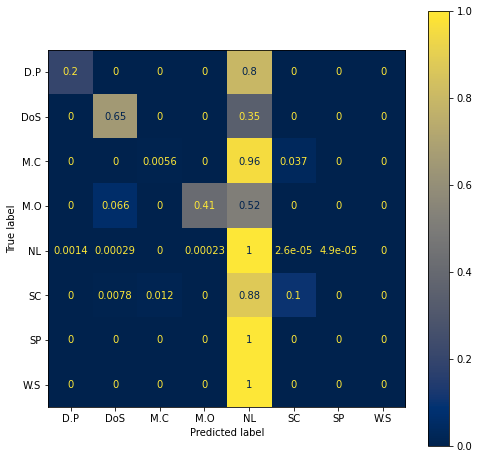

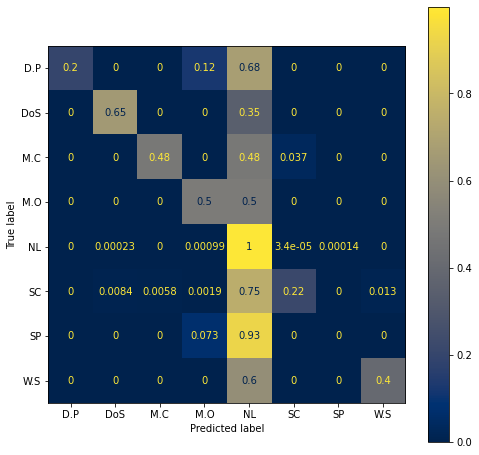

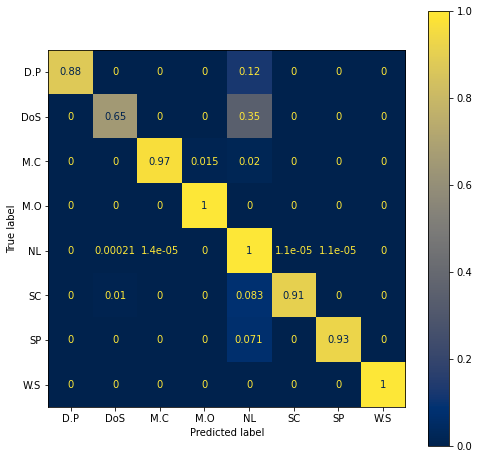

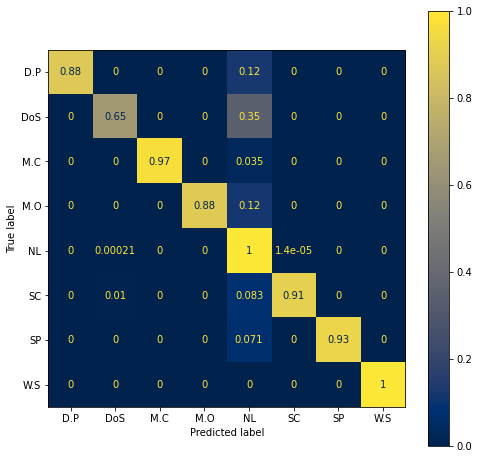

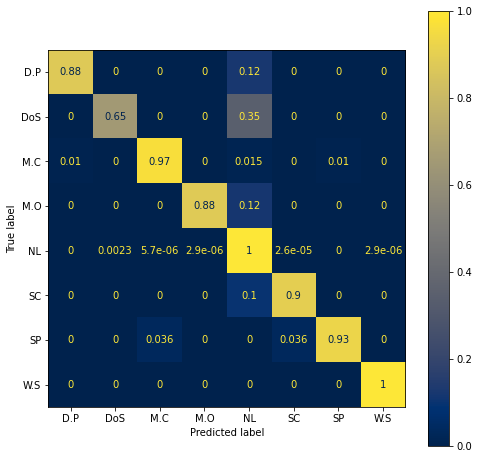

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

# For all models
labels = le.inverse_transform(list(range(0, len(cm[model[0]]))))
for model in models:
    # Normalise
    normalized_cm = cm[model[0]].astype('float') / cm[model[0]].sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=labels)
    disp.plot(cmap='cividis')

## ROC Curve

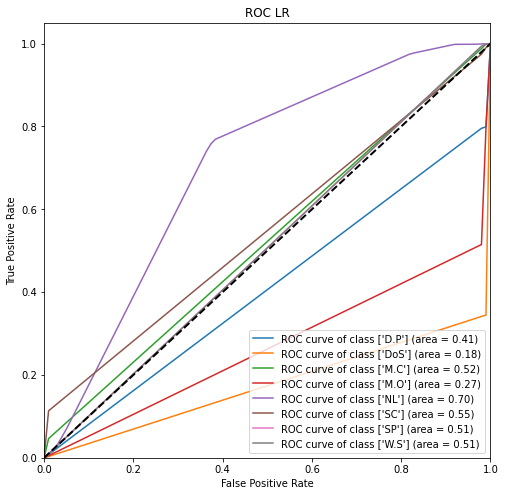

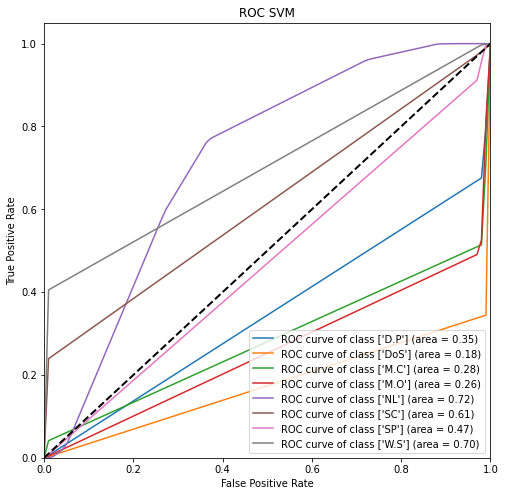

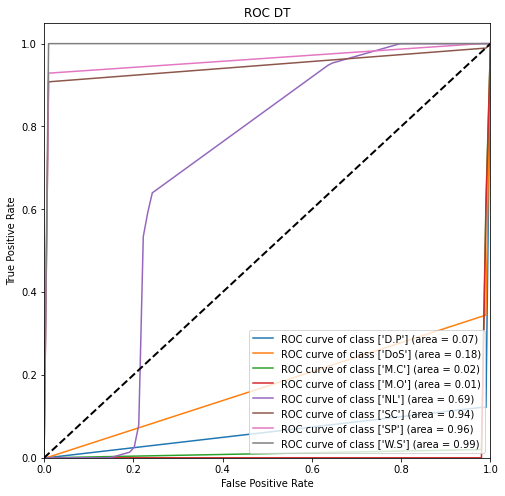

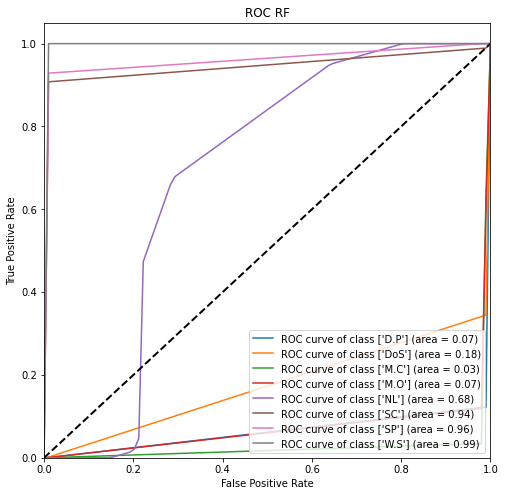

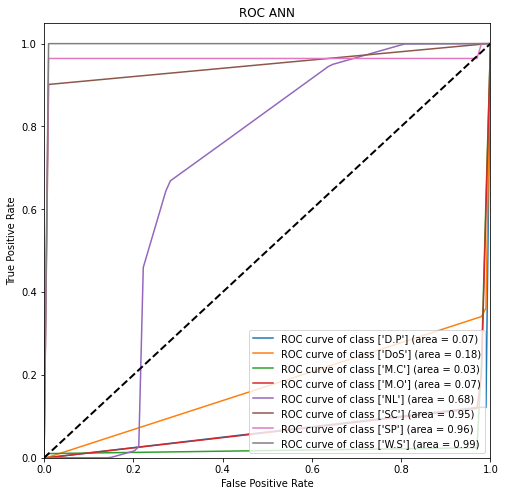

In [20]:
# For all models
for model in models:
    plt.figure()
    lw = 2
    tpr = roc[model[0]]['tpr']
    # For all classes
    for i in range (0, len(cm[model[0]])):
        mean_tpr = tpr[i]
        # Compute the mean auc based on the mean FPR ant TPR
        mean_auc = mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(le.inverse_transform([i]), mean_auc))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC {}'.format(model[0]))
    plt.legend(loc="lower right")
    plt.show()